## Importing Required Libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Importing the Data

In [149]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Brain-tumor-detection.csv")

In [150]:
df.head()

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [151]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 241 non-null    float64
 1   Perimeter            241 non-null    float64
 2   Convex Area          241 non-null    float64
 3   Solidity             241 non-null    float64
 4   Equivalent Diameter  241 non-null    float64
 5   Major Axis           241 non-null    float64
 6   Minor Axis           241 non-null    float64
 7   Eccentricity         241 non-null    object 
 8   Class                241 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 17.1+ KB


In [153]:
df.shape

(241, 9)

## Exploratory Data Analysis

### Checking for any missing values

In [154]:
df.isnull().sum().sum()

0

### Checking for any duplicates

In [155]:
df.duplicated().sum()

51

In [156]:
df.drop_duplicates(inplace=True)

In [157]:
df.duplicated().sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 240
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 190 non-null    float64
 1   Perimeter            190 non-null    float64
 2   Convex Area          190 non-null    float64
 3   Solidity             190 non-null    float64
 4   Equivalent Diameter  190 non-null    float64
 5   Major Axis           190 non-null    float64
 6   Minor Axis           190 non-null    float64
 7   Eccentricity         190 non-null    object 
 8   Class                190 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ KB


In [159]:
def comp_eccentric(x):
    if x.isnumeric()==True:
        return abs(complex(x))
    else:
        return abs(complex(x[1:-1]))

In [160]:
df['Eccentricity'] = df['Eccentricity'].apply(comp_eccentric)

In [161]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168,1
...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,2.013375,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.800646,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0.296509,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0.206967,0


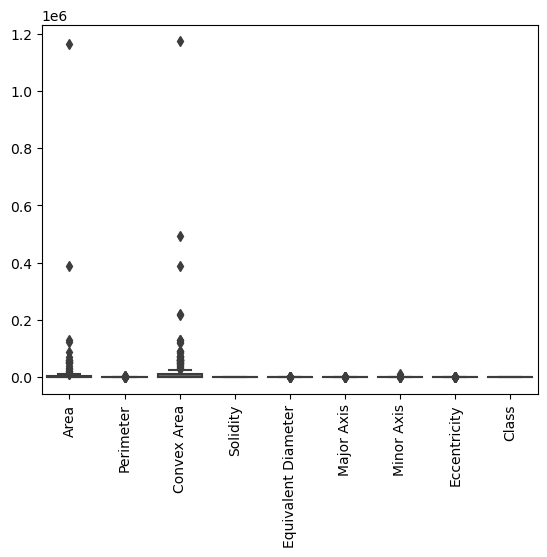

In [162]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [163]:
df.var()

Area                   8.114450e+09
Perimeter              5.160309e+05
Convex Area            1.003999e+10
Solidity               9.321265e-02
Equivalent Diameter    1.423763e+04
Major Axis             4.762674e+04
Minor Axis             1.024955e+06
Eccentricity           6.169704e+00
Class                  2.209969e-01
dtype: float64

In [184]:
X=df.drop('Class',axis=1)
y=df['Class']

In [185]:
X

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,1.378312
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.658266
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,1.335325
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,1.030671
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,1.388168
...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,2.013375
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.800646
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,0.296509
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,0.206967


<Axes: >

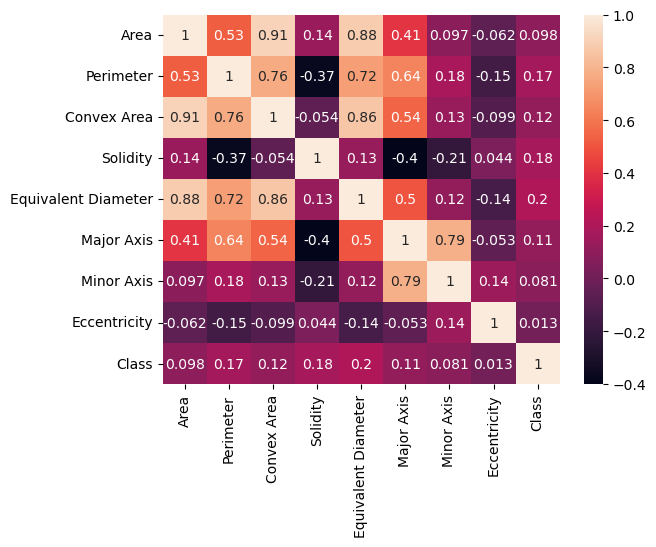

In [166]:
sns.heatmap(data=df.corr(),annot=True)

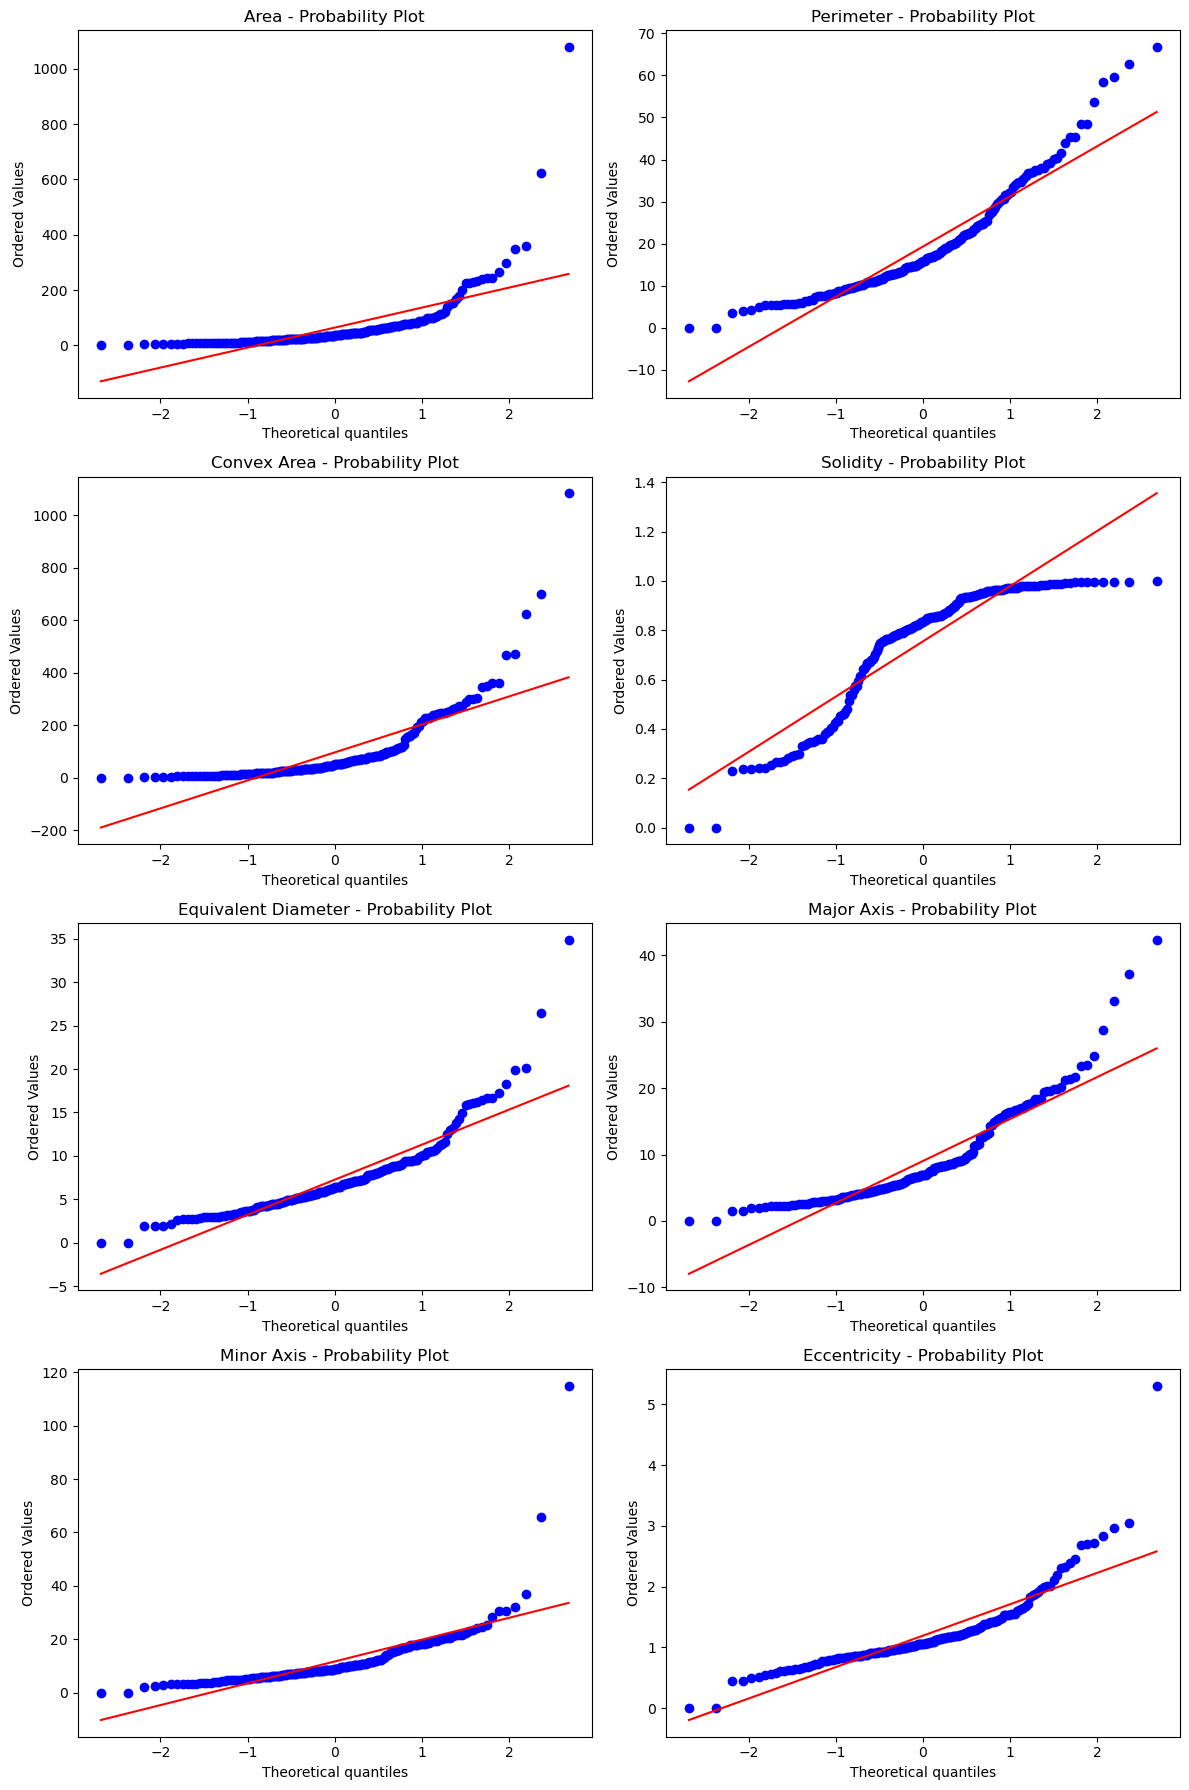

In [167]:
import scipy.stats as stats

n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 18))

for i, column in enumerate(list(X.columns)):
    stats.probplot(np.sqrt(X[column]), dist="norm", plot=axes[i // n_cols, i % n_cols])
    axes[i // n_cols, i % n_cols].set_title(f'{column} - Probability Plot')

plt.tight_layout()
plt.show()

In [168]:
X_test.columns

Index(['Area', 'Perimeter', 'Convex Area', 'Solidity', 'Equivalent Diameter',
       'Major Axis', 'Minor Axis', 'Eccentricity'],
      dtype='object')

## Splitting the Data

In [233]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=69)

In [234]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.outliers import Winsorizer

class WinsorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, tail='both', fold=1):
        self.tail = tail
        self.fold = fold

    def fit(self, X, y=None):
        self.winsorizers = {}
        for col in X.columns:
            self.winsorizers[col] = Winsorizer(
                capping_method='mad',
                tail=self.tail,
                fold=self.fold
            )
            self.winsorizers[col].fit(X[[col]])
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(index=X.index)
        for col, winsorizer in self.winsorizers.items():
            X_transformed[col] = winsorizer.transform(X[[col]]).squeeze()
        return X_transformed
# Define the pipeline
pipeline = Pipeline(steps=[
    ('winsorizer', WinsorizerTransformer(tail='both', fold=1)),
    ('classifier', GaussianNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)


In [190]:
accuracy_score(y_test,predictions)

0.75

In [235]:
import pickle
pickle.dump(pipeline,open("tumor.pkl","wb"))

In [193]:
X_test

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity
74,1759.0,177.195958,1900.5,0.925546,47.324712,41.335869,58.634037,1.006022
217,47.0,28.142135,50.0,0.940000,7.735778,6.490871,10.999609,1.368124
23,3294.5,1147.075244,46929.5,0.070201,64.766409,288.832275,329.591522,0.549681
240,250.0,66.769552,264.0,0.946970,17.841241,12.933073,26.319555,1.772417
31,10355.0,473.587874,11766.0,0.880078,114.823323,102.632042,140.724670,0.938122
13,3008.0,313.078208,4086.5,0.736082,61.886223,49.959129,113.803520,2.046699
8,4123.5,279.865005,4550.5,0.906164,72.458286,63.913658,88.792999,0.964395
140,1933.0,171.681239,1972.5,0.979975,49.610201,43.783520,57.397675,0.847685
47,61.0,30.142135,63.5,0.960630,8.812923,8.360630,10.461595,0.752152
94,3162.0,240.450791,3441.5,0.918785,63.450638,56.334202,74.343369,0.861143


In [194]:
X_test.iloc[16].tolist()

[28527.0,
 3924.6887123584743,
 491608.5,
 0.0580278819426433,
 190.5825398420852,
 831.5266723632812,
 1039.04931640625,
 0.7492801706430646]

In [230]:
predict = pickle.load(open("tumor.pkl","rb"))
#predicted_value = predict.predict(X_test)
predicted_value = pd.DataFrame(predict.predict(X_test.iloc[[16]]))

In [232]:
predicted_value.values[0][0]

1

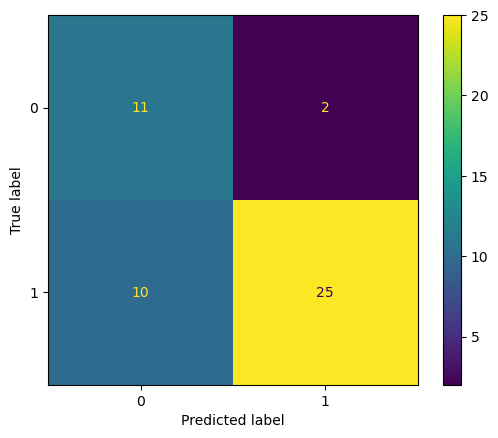

In [147]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot()